In [158]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

In [159]:
file_path = 'C:\\Users\\Asus\\Desktop\\FİNALÖDEVİ\\VeriSeti.csv'
data = pd.read_csv(file_path)

In [160]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.fillna(data.mean(), inplace=True)

In [161]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [163]:
mlp_model = MLPClassifier(hidden_layer_sizes=(12, 8), max_iter=300, solver='adam', random_state=42)
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(12, 8), max_iter=300, random_state=42)

In [164]:
y_pred = mlp_model.predict(X_test)
y_pred_proba = mlp_model.predict_proba(X_test)[:, 1]

In [165]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

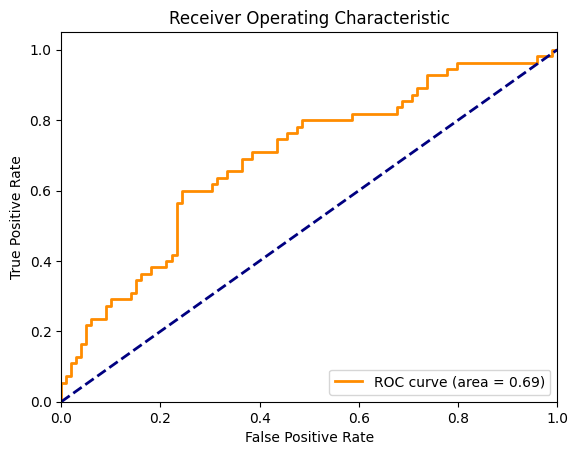

(0.6623376623376623,
 array([[76, 23],
        [29, 26]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.72      0.77      0.75        99\n           1       0.53      0.47      0.50        55\n\n    accuracy                           0.66       154\n   macro avg       0.63      0.62      0.62       154\nweighted avg       0.65      0.66      0.66       154\n',
 0.6920110192837465)

In [166]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

accuracy, conf_matrix, class_report, roc_auc